## Principal Component Analysis(PCA)

Principal-component analysis, or PCA, is a technique for taking a dataset consisting of a set of tuples representing points in a high-dimensional space and
finding the directions along which the tuples line up best.
You mustn't use quotation marks around the name of the image files in markdown!

Mapping on all directions | Energy solution
- | - 
![alt](Q7HIP.gif) | ![alt](lNHqt.gif)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
from math import floor, ceil
import numpy as np

RANDOM_STATE = 42
FIG_SIZE = (10, 7)

data = load_wine()
X, y = data['data'], data['target']
print(data['DESCR'])


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## Visualizing Data

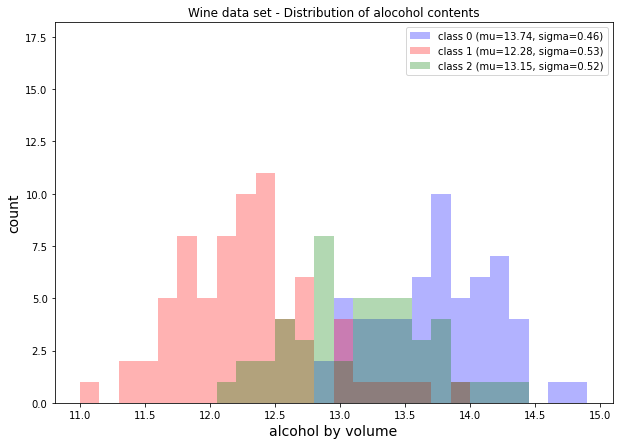

In [15]:
plt.figure(figsize=FIG_SIZE)

# bin width of the histogram in steps of 0.15
bins = np.arange(floor(min(X[:,0])), ceil(max(X[:,0])), 0.15)

# get the max count for a particular bin for all classes combined
max_bin = max(np.histogram(X[:,0], bins=bins)[0])

# the order of the colors for each histogram
colors = ('blue', 'red', 'green')

for label,color in zip(
        range(3), colors):

    mean = np.mean(X[:,0][y == label]) # class sample mean
    stdev = np.std(X[:,0][y == label]) # class standard deviation
    plt.hist(X[:,0][y == label],
             bins=bins,
             alpha=0.3, # opacity level
             label='class {} (mu={:.2f}, sigma={:.2f})'.format(label, mean, stdev),
             color=color)

plt.ylim([0, max_bin*1.3])
plt.title('Wine data set - Distribution of alocohol contents')
plt.xlabel('alcohol by volume', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.legend(loc='upper right')

plt.show()

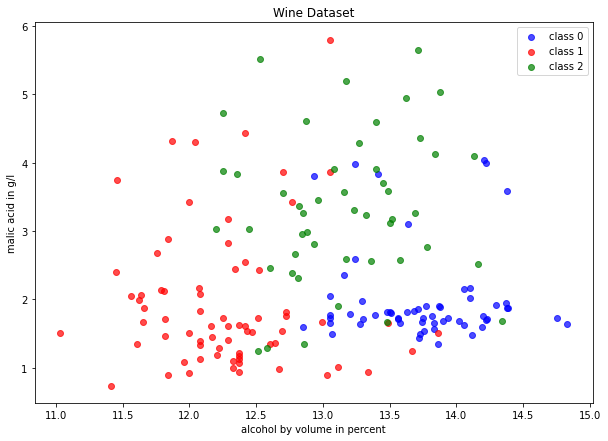

In [16]:
plt.figure(figsize=FIG_SIZE)

for label,color in zip(
        range(3),('blue', 'red', 'green')):

    plt.scatter(x=X[:,0][y == label], # x-axis: feat. from col. 1
                y=X[:,1][y == label], # y-axis: feat. from col. 2
                color=color,
                alpha=0.7,
                label='class {:}'.format(label) # label for the legend
                )

plt.title('Wine Dataset')
plt.xlabel('alcohol by volume in percent')
plt.ylabel('malic acid in g/l')
plt.legend(loc='upper right')

plt.show()

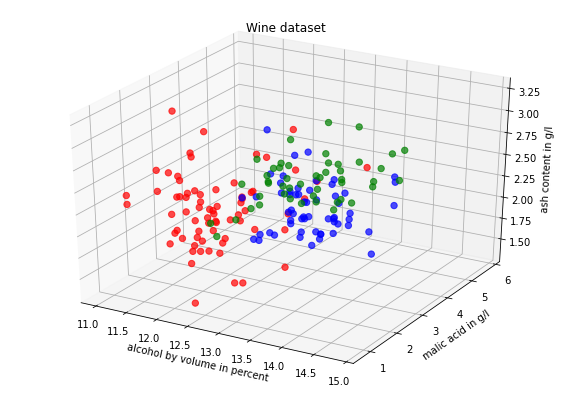

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=FIG_SIZE)
ax = fig.add_subplot(111, projection='3d')

for label,color in zip(
        range(3),('blue','red','green')):

    ax.scatter(X[:,0][y == label],
               X[:,1][y == label],
               X[:,2][y == label],  
               color=color,
               s=40,
               alpha=0.7,
               label='class {}'.format(label))

ax.set_xlabel('alcohol by volume in percent')
ax.set_ylabel('malic acid in g/l')
ax.set_zlabel('ash content in g/l')

plt.title('Wine dataset')

plt.show()

## Splitting data
Due to the fact that the dataset is small, we will do K fold cross-validation to evaluate the performances

In [18]:
from sklearn.model_selection import cross_val_score

unscaled_clf = make_pipeline(PCA(n_components=2), LogisticRegression(multi_class='ovr'))
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(multi_class='ovr'))

scores_unscaled = cross_val_score(unscaled_clf, X, y, cv=10)
scores_std = cross_val_score(std_clf, X, y, cv=10)

print('\nPrediction accuracy for the raw dataset with PCA')
print('{:.2%}\n'.format(scores_unscaled.mean()))

print('\nPrediction accuracy for the normalized dataset with PCA')
print('{:.2%}\n'.format(scores_std.mean()))


Prediction accuracy for the raw dataset with PCA
65.29%


Prediction accuracy for the normalized dataset with PCA
96.63%



In [24]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_.shape)
X_transformed = pca.fit_transform(X)

X_transformed.dot(pca.components_).shape
np.argwhere(pca.components_[0] == max(pca.components_[0])), np.argwhere(pca.components_[1] == max(pca.components_[1])), 

(2, 13)


(array([[12]]), array([[4]]))

In [25]:
pca.components_

array([[ 1.65926472e-03, -6.81015556e-04,  1.94905742e-04,
        -4.67130058e-03,  1.78680075e-02,  9.89829680e-04,
         1.56728830e-03, -1.23086662e-04,  6.00607792e-04,
         2.32714319e-03,  1.71380037e-04,  7.04931645e-04,
         9.99822937e-01],
       [ 1.20340617e-03,  2.15498184e-03,  4.59369254e-03,
         2.64503930e-02,  9.99344186e-01,  8.77962152e-04,
        -5.18507284e-05, -1.35447892e-03,  5.00440040e-03,
         1.51003530e-02, -7.62673115e-04, -3.49536431e-03,
        -1.77738095e-02]])

## Making pipeline and fitting

In [7]:
# Fit to data and predict using pipelined Logistic regression and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), LogisticRegression(multi_class='ovr'))
unscaled_clf.fit(X, y)

# Fit to data and predict using pipelined normalization, Logistic regression and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(multi_class='ovr'))
std_clf.fit(X, y)

# Extract PCA from pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']
# Use PCA without and with normalization on data for visualization.
X_transformed = pca.transform(X)
scaler = std_clf.named_steps['standardscaler']
X_std_transformed = pca_std.transform(scaler.transform(X))

In [10]:
print(pca_std.explained_variance_ratio_)
from scipy.linalg import svd
u,s,v = svd(scaler.transform(X))
expl_var_rat = np.array([s[i]**2 / sum(s**2) for i in range(len(s))])
print(pca_std.components_)
print(v[:2,:])

[0.36198848 0.1920749 ]
[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]]
[[-0.1443294   0.24518758  0.00205106  0.23932041 -0.14199204 -0.39466085
  -0.4229343   0.2985331  -0.31342949  0.0886167  -0.29671456 -0.37616741
  -0.28675223]
 [ 0.48365155  0.22493093  0.31606881 -0.0105905   0.299634    0.06503951
  -0.00335981  0.02877949  0.03930172  0.52999567 -0.27923515 -0.16449619
   0.36490283]]


In [12]:
expl_var_rat

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

array([28.94203422, 21.08225141, 16.04371561, 12.78973645, 12.32374195,
       10.68713954,  9.90368818,  7.8760733 ,  7.17081793,  6.6828618 ,
        6.33958815,  5.48097635,  4.28967045])

In [9]:
variance_rat = []
for var_mem in expl_var_rat:
    variance_rat.append(var_mem)
    if sum(variance_rat)>=0.90:
        break
variance_rat

[0.361988480999263,
 0.1920749025700899,
 0.11123630536249957,
 0.0706903018271402,
 0.06563293679648596,
 0.04935823319222565,
 0.042386793226233135,
 0.026807489483788662]

In [33]:
clf_pca8 = make_pipeline(StandardScaler(), PCA(n_components=10), LogisticRegression(multi_class='ovr'))
scores_pca8 = cross_val_score(clf_pca8, X, y, cv=10)
print('{:.2%}\n'.format(scores_pca8.mean()))

98.33%



## Visualization of PCA (normalized vs raw)

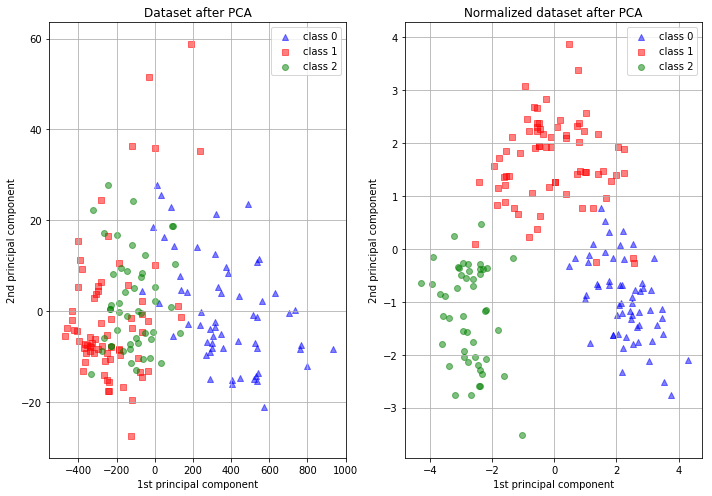

In [6]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)


for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_transformed[y == l, 0],
                X_transformed[y == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_std_transformed[y == l, 0],
                X_std_transformed[y == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Dataset after PCA')
ax2.set_title('Normalized dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

## Linear Discriminant Analysis(LDA)

![Title](lda_1.png)
![Title](lda_2.png)
![Title](lda_3.png)
![Title](lda_4.png)
![Title](lda_10.png)

## Application on the same wine dataset

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X, y = data['data'], data['target']
unscaled_clf = make_pipeline(LinearDiscriminantAnalysis(n_components=2), LogisticRegression(multi_class='ovr'))
std_clf = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2), LogisticRegression(multi_class='ovr'))

scores_unscaled = cross_val_score(unscaled_clf, X, y, cv=10)
scores_std = cross_val_score(std_clf, X, y, cv=10)

print('\nPrediction accuracy for the raw dataset with LDA')
print('{:.2%}\n'.format(scores_unscaled.mean()))

print('\nPrediction accuracy for the normalized dataset with LDA')
print('{:.2%}\n'.format(scores_std.mean()))


Prediction accuracy for the raw dataset with LDA
98.36%


Prediction accuracy for the normalized dataset with LDA
98.36%



/home/erohar/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/erohar/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


As you can see normalization doesn't play a role in LDA, you can apply it freely on raw data. For mathematical explanation please look at this post at stats.stackexchange.com: https://stats.stackexchange.com/questions/109071/standardizing-features-when-using-lda-as-a-pre-processing-step

## Reduce dimension of the data with LDA

In [12]:
clf = LinearDiscriminantAnalysis(n_components=2)
clf.fit(X, y)
print(clf.explained_variance_ratio_)
X_transformed = clf.transform(X)


[0.68747889 0.31252111]


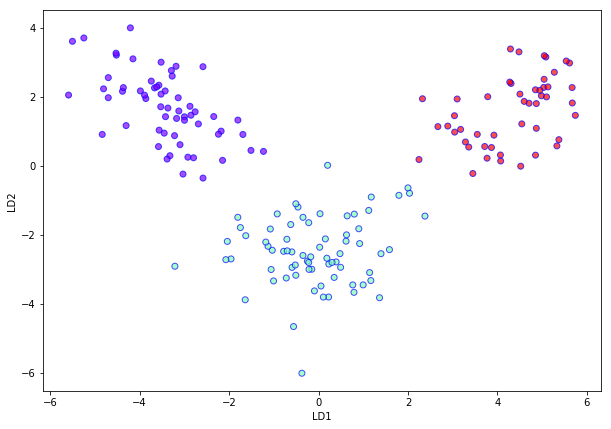

In [9]:
plt.figure(figsize=FIG_SIZE)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_transformed[:,0],
    X_transformed[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
plt.show()

In [11]:
lda = LinearDiscriminantAnalysis(n_components=2)

scores_lda = cross_val_score(lda, X, y, cv=10)


print('\nPrediction accuracy for with LDA')
print('{:.2%}\n'.format(scores_lda.mean()))



Prediction accuracy for with LDA
98.33%



/home/erohar/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
